In [2]:
import os
from matplotlib import pyplot as plt
from PIL import Image #Procesamiento Digital de IMágenes
import numpy as np

# 1.Dataset

In [3]:
if not os.path.exists('lfwcrop_grey'):
    !wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
    !unzip 'lfwcrop_grey.zip'

filenames = []
images = []

for filename in os.listdir('lfwcrop_grey/faces'):
    filenames.append(filename)
    image = np.array(Image.open(os.path.join('lfwcrop_grey/faces', filename)))
    images.append(image)

images = np.array(images)

print('Total Number of Faces: {}'.format(len(images)))
print(images.shape)
n = 64*64 #dimensión de mis datos (original) n = 4096 features
X = images.reshape(13233, n) # m = 13233 ejemplos de entrenamiento
print(X.shape)


--2023-04-12 13:43:02--  http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
Resolving conradsanderson.id.au (conradsanderson.id.au)... 43.250.142.19, 2400:b800:3:1::1a
Connecting to conradsanderson.id.au (conradsanderson.id.au)|43.250.142.19|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip [following]
--2023-04-12 13:43:03--  https://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
Connecting to conradsanderson.id.au (conradsanderson.id.au)|43.250.142.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51132813 (49M) [application/zip]
Saving to: ‘lfwcrop_grey.zip’

lfwcrop_grey.zip    100%[===================>]  48.76M  12.2MB/s    in 4.6s    

2023-04-12 13:43:08 (10.6 MB/s) - ‘lfwcrop_grey.zip’ saved [51132813/51132813]

Archive:  lfwcrop_grey.zip
   creating: lfwcrop_grey/
   creating: lfwcrop_grey/lists/
  inflating: lfwcrop_grey/lists/07_test_same.txt  
  infla

# 2.Visualización del Dataset

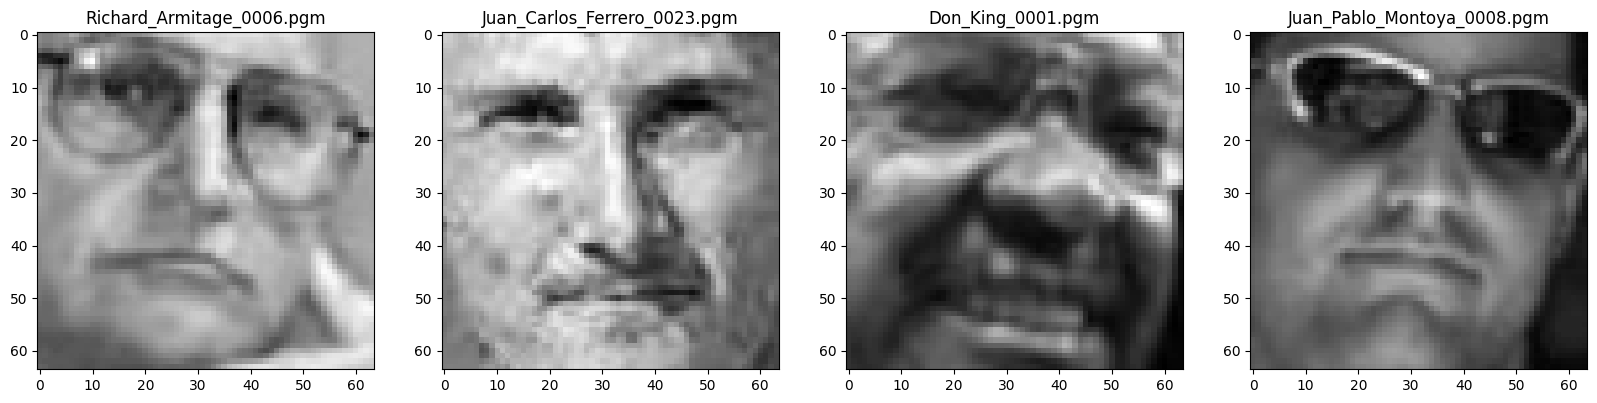

In [4]:
plt.figure(figsize=(20, 10))
num_images = 4
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    index = np.random.choice(range(len(images)))
    image = images[index]
    filename=filenames[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

# 3.Compresión de imágenes de rostros con PCA

In [11]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
explained_variance = 0.95 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

PCA(n_components=0.95)

In [12]:
z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 180)
El número de componentes principales K es 180  que retienen el  95.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 180)
PCA consigue reducir el tamaño en disco al  4.39453125 % de su tam. original


Bad pipe message: %s [b"\xcb&T\xfc\x19%\xf1&cD\x8a\x0b2w1\x8c\xb4)\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x03\x03\x02\x03\x03\x01\x02\x01\x03"]
Bad pipe message: %s [b'\x02']
Bad pipe message: %s [b'\x05\x02\x06']
Bad pipe message: %s [b" \x1c\xf0\xbc\xdc\xf0\xb9Y\x9d\x13\x1a\xb1\x1f2N\x8e\x0c\x8b\x00\x00\xa6

# 4.Visualizando los eigenvectors (Ureduce-> EigenFaces)

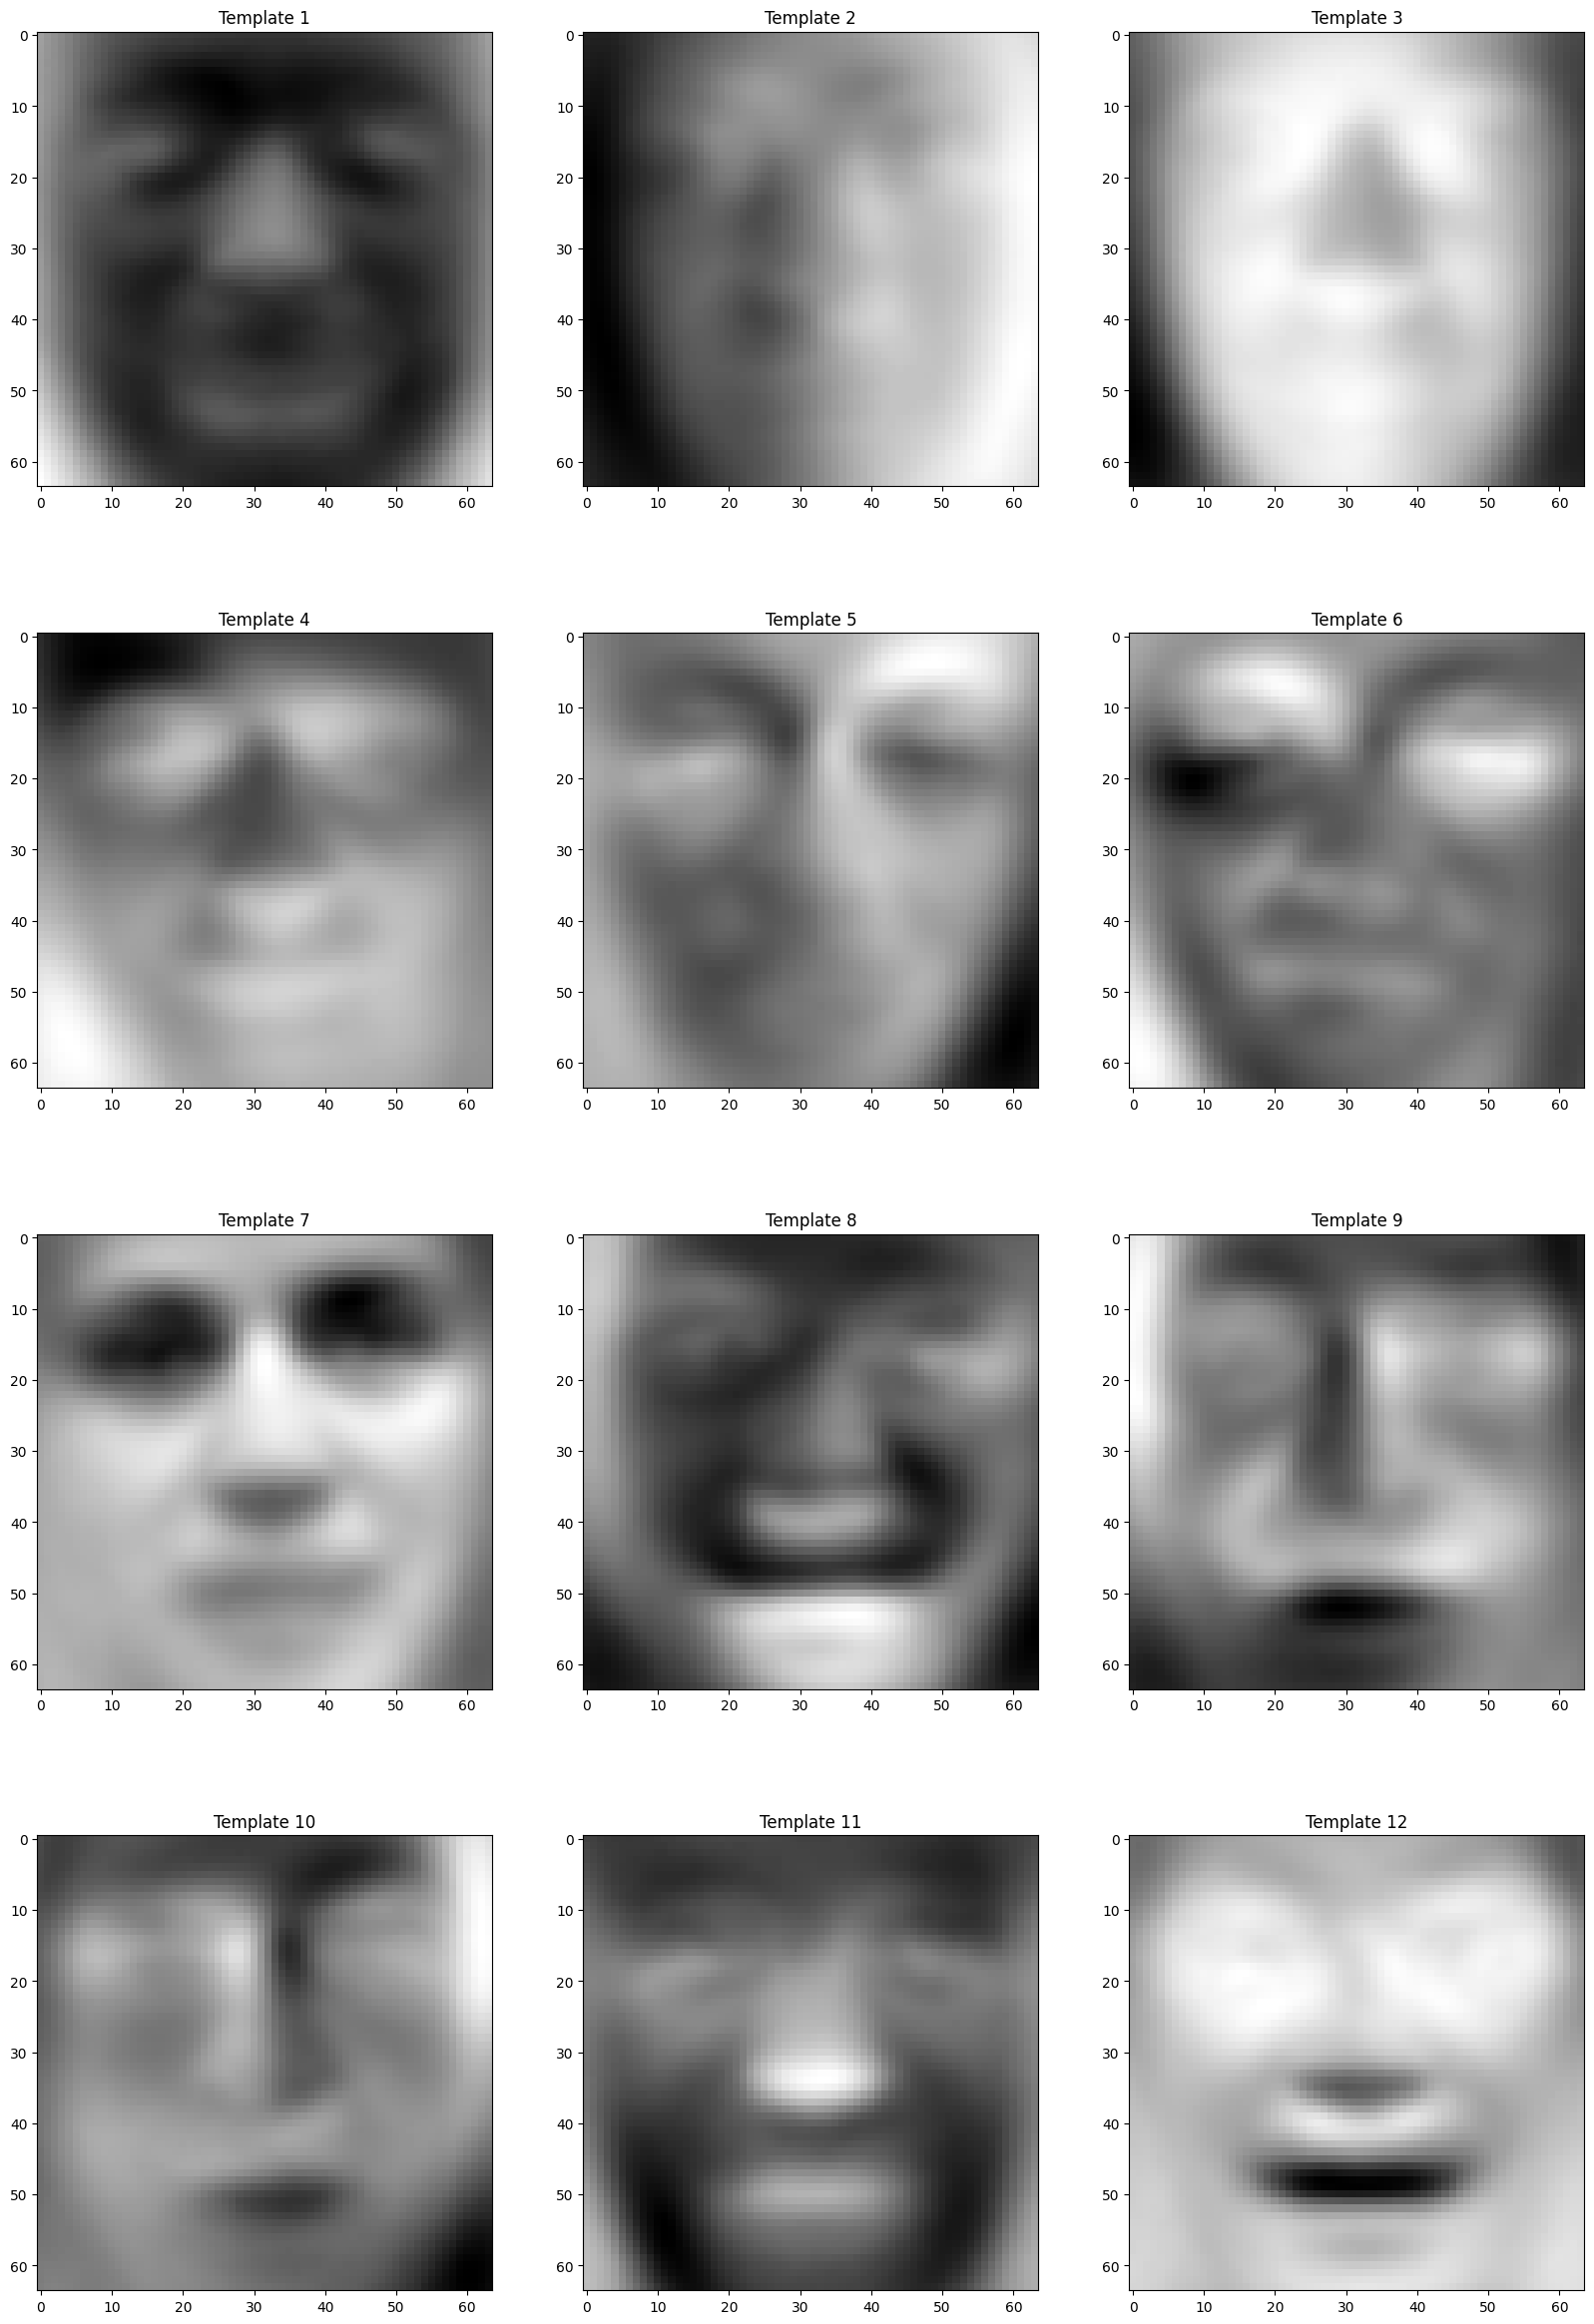

In [7]:
EigenFaces = Ureduce.reshape(64, 64, K) #Eigenfaces = Eigen + Faces.  Eigenvector = vector propio (forman un espacio vectorial)

plt.figure(figsize=(20, 30))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(EigenFaces[:,:,i], 'gray')
    plt.title('Template {}'.format(i+1))

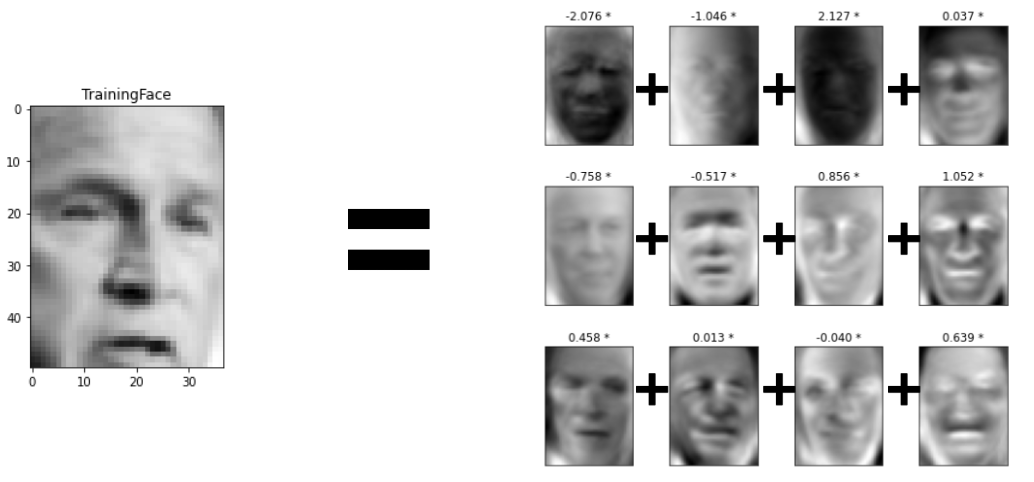

# 5.Reconstrucción de imagenes de rostros

Label Chanda_Rubin_0005.pgm


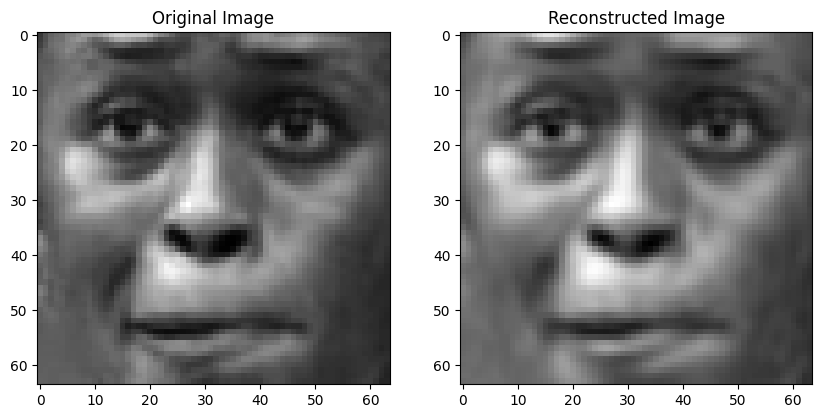

In [8]:
import random
random.seed(a=877)

#Implementa x_approx = Ureduce*z
X_approx = pca.inverse_transform(z) #transformada KL

# índice de la imagen a graficar
index = random.randint(0,13233)
reconstructed_image = X_approx[index]
reconstructed_image = reconstructed_image.reshape(64, 64)

print('Label {}'.format(filenames[index]))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(images[index], 'gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, 'gray')

# 6.Actividades 
Todas las actividades tienen el mismo puntaje

## 6.1 Varianza retenida vs número de componentes

Grafique la varianza retenida en función del número de componentes principales retenidos k. Para esto, modifique la variable `explained_variance` con los siguientes valores: 0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7. 
Para cada valor, verifique el número de componentes principales retenidos k.

In [9]:
#AQUÍ SU CÓDIGO

## 6.2 Compresión y calidad de la imagen

Grafique el porcentaje de compresión dado por k/n en función del número de componentes retenidos k. Para esto, modifique la variable `explained_variance` con los siguientes valores: 0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7.  Para cada valor, verifique el número de componentes princiaples retenidos k.

Por otro lado, para cada valor de k, grafique un rostro para ver la pérdida de calidad a medida que el número de componentes k disminuye.




## 6.3 Proyectar mi rostro en los Eigenfaces

Tomar una imagen suya y "proyectarla" (transformarla) en los Eigenfaces. Recuerde que su rostro debe estar escalada a 64x64 pixeles y en formato pgm. No se olvide de realizar el reshape a 4096. Luego, reconstruir su imagen y graficar la original junto con la reconstruida. Para este apartado, retener 99% de la varianza

In [10]:
#AQUÍ SU CÓDIGO

## 6.4 Conclusiones

Concluya aquí su trabajo.